# 03_futures_analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Acquisition & Preprocessing
Load manually downloaded spot and futures CSV files.

In [26]:
# Load data
spot = pd.read_csv('NIFTY_spot.csv', parse_dates=['Date'], index_col='Date')['Close']
futures = pd.read_csv('NIFTY_futures.csv', parse_dates=['Date'], index_col='Date')['Price']

# Prepare dataframe
df = pd.DataFrame({'Spot': spot, 'Futures': futures}).dropna()
df['Spot'] = df['Spot'].astype(str).str.replace(',', '').astype(float)
df['Futures'] = df['Futures'].astype(str).str.replace(',', '').astype(float)

df.head()

C:\Users\Vatsh Van\AppData\Local\Temp\ipykernel_22516\2461601735.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spot = pd.read_csv('NIFTY_spot.csv', parse_dates=['Date'], index_col='Date')['Close']


,Spot,Futures
Date,,
2024-07-01,24141.95,24311.10
2024-07-02,24123.85,24319.05
2024-07-03,24286.50,24462.50
2024-07-04,24302.15,24471.00
2024-07-05,24323.85,24497.25


## 2. Theoretical Futures Price & Basis Calculation

In [27]:
r = 0.05  # risk-free rate
q = 0.013 # dividend yield
T = pd.to_datetime('2025-06-30')  # expiry date

df['Tau'] = (T - df.index).days / 365
df['F_theo'] = df['Spot'] * np.exp((r - q) * df['Tau'])
df['Basis'] = df['Futures'] - df['F_theo']
df.head()

,Spot,Futures,Tau,F_theo,Basis
Date,,,,,
2024-07-01,24141.95,24311.10,0.997260,25049.393642,-738.293642
2024-07-02,24123.85,24319.05,0.994521,25028.076081,-709.026081
2024-07-03,24286.50,24462.50,0.991781,25194.268567,-731.768567
2024-07-04,24302.15,24471.00,0.989041,25207.948069,-736.948069
2024-07-05,24323.85,24497.25,0.986301,25227.899400,-730.649400


## 3. Spot, Futures & Theoretical Futures Plot

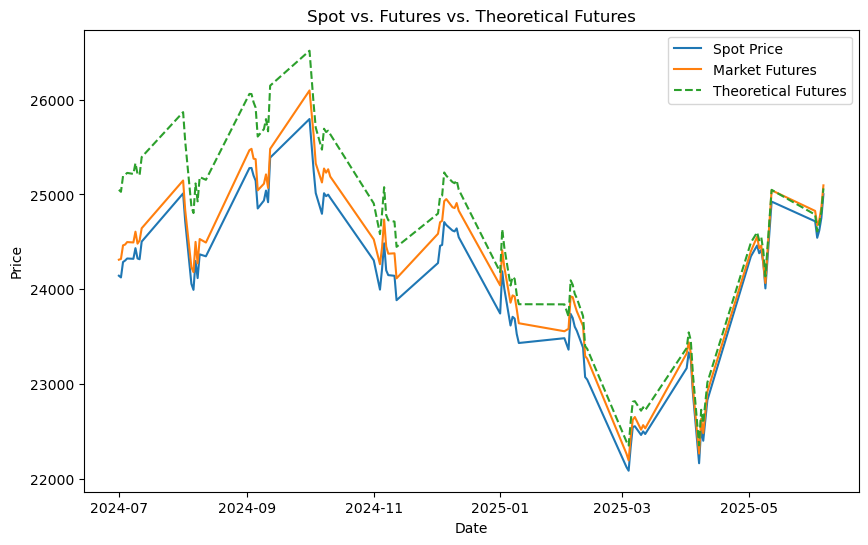

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Spot'], label='Spot Price')
plt.plot(df.index, df['Futures'], label='Market Futures')
plt.plot(df.index, df['F_theo'], label='Theoretical Futures', linestyle='--')
plt.title('Spot vs. Futures vs. Theoretical Futures')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('futures_price_plot.png')
plt.show()

## 4. Basis Over Time

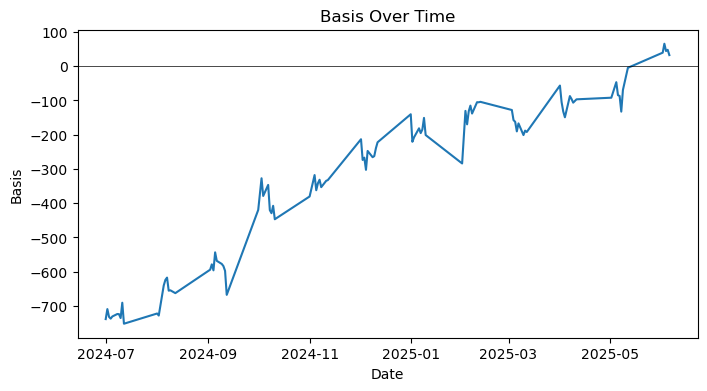

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Basis'])
plt.axhline(0, color='black', lw=0.5)
plt.title('Basis Over Time')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.savefig('futures_basis_plot.png')
plt.show()

## 5. Mark-to-Market (MTM) Simulation

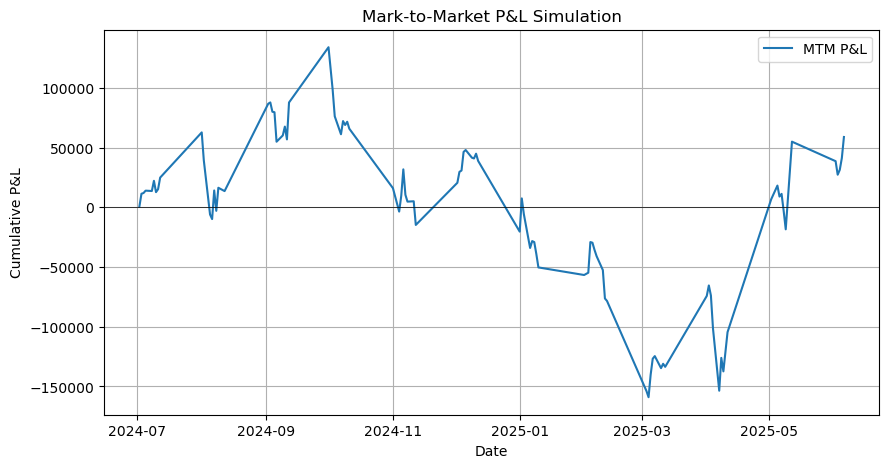

In [34]:
contract_size = 75
df['Delta_PnL'] = df['Futures'].diff() * contract_size
df['Cumulative_PnL'] = df['Delta_PnL'].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Cumulative_PnL'], label='MTM P&L')
plt.title('Mark-to-Market P&L Simulation')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')
plt.legend()
plt.axhline(0, color='black', lw=0.5)
plt.grid()
plt.savefig('futures_mtm_pnl.png')
plt.show()